<h2>Sentimen Analisis Dataset Twitter Indonesia</h2>

data yang saya gunakan berasal dari 
<li>Dataset : https://github.com/ridife/dataset-idsa</li>

data di analisis menggunakan Decission Tree Classifier, Random Forest Classifier, dan juga Convlutional Neural Network 1D

In [1]:
# import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('dataset/Indonesian Sentiment Twitter Dataset Labeled.csv')

In [3]:
len(df)

10806

In [4]:
df.head()

,sentimen,Tweet
0,-1,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...
1,-1,kita lanjutkan saja diam ini hingga kau dan ak...
2,1,doa rezeki tak putus inna haa zaa larizquna ma...
3,1,makasih loh ntar kita bagi hasil aku 99 9 sisa...
4,-1,aku tak faham betul jenis orang malaysia yang ...


In [5]:
df.tail()

,sentimen,Tweet
10801,1,Jangan membandingkan kehidupanmu dengan kehidu...
10802,0,Sini uname lu ntar gua follow
10803,1,Apapun yg telah kamu lakukan apapun kesalahanm...
10804,1,3 cara untuk ingat semula apa yang kita dah ha...
10805,1,Semoga Allah permudahkan urusan aku amp orang ...


In [6]:
# Remove duplikat jika dibutuhkan

df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [7]:
len(df)

10257

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10257 entries, 0 to 10256
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  10257 non-null  int64 
 1   Tweet     10257 non-null  object
dtypes: int64(1), object(1)
memory usage: 160.4+ KB


In [9]:
df['sentimen']=df['sentimen'].replace({-1:0,0:1,1:2})

In [10]:
df_counts = df['sentimen'].value_counts().reset_index()
df_counts

,index,sentimen
0,1,5084
1,0,2691
2,2,2482


Text(2, 2, '2482')

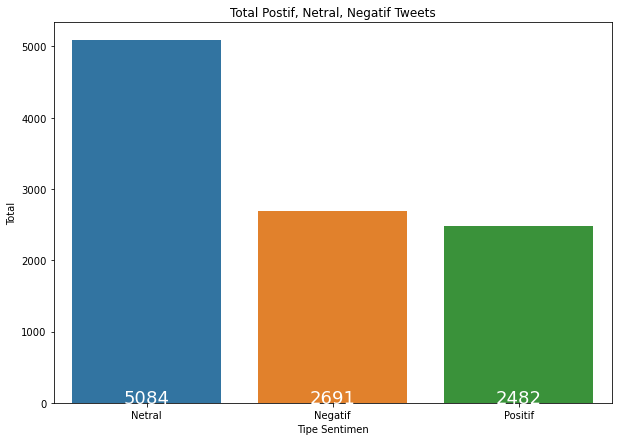

In [11]:
# kita bisa melihat perbandingan data antara positif, negatif, dan netral using barplot

plt.figure(figsize=(10, 7))
sns.barplot(data=df_counts.replace({0:'Negatif',1:'Netral',2:'Positif'}), x='index', y='sentimen',)
plt.xlabel("Tipe Sentimen");
plt.ylabel("Total");
plt.title("Total Postif, Netral, Negatif Tweets");

plt.text(x=0, y=2, s="5084", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.text(x=1, y=2, s="2691", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.text(x=2, y=2, s="2482", 
                 color='white', fontsize=18, horizontalalignment='center')

In [12]:
positif = df[df['sentimen']==2]
positif = positif['Tweet']
netral = df[df['sentimen']==1]
netral = netral['Tweet']
negatif = df[df['sentimen']==0]
negatif= negatif['Tweet']

In [13]:
# Cleaning data

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Data Positif
positif1 = positif.tolist()
positif2 = "".join(positif1)
positif3 = positif2.translate(str.maketrans("","",string.punctuation))
positif4 = re.sub(r"\d+", "", positif3)
# positif5 = stemmer.stem(positif4)
pos = positif4.lower()

# Data Netral
netral1 = netral.tolist()
netral2 = "".join(netral1)
netral3 = netral2.translate(str.maketrans("","",string.punctuation))
netral4 = re.sub(r"\d+", "", netral3)
# netral5 = stemmer.stem(netral4)
netr = netral4.lower()

# Data Negatif
negatif1 = negatif.tolist()
negatif2 = "".join(negatif1)
negatif3 = negatif2.translate(str.maketrans("","",string.punctuation))
negatif4 = re.sub(r"\d+", "", negatif3)
# negatif5 = stemmer.stem(negatif4)
neg = negatif4.lower()

In [14]:
print(pos)

doa rezeki tak putus inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p makasih loh ntar kita bagi hasil aku   sisanya buat kamuya aku akan menjadi satu satunya bukan nomor satu tetapi satu satunyai dont know why but these zikir sangat membantu aku pon dapat hasil dari orang retweetambil usaha sambil doa insha alla aah kamu aja mas aku lebih suka diayomi mau bantu aku nabung tak peduli seperti apa hidupmu kamu selalu punya pilihan untuk melihat dari sisi baiknya atau sisi buruknya aku dah tahu macam mana nak bagi pengantin gelak natural hahahahahahahahahahaha cara nak mintak maaf ada   aku minta maaf  aku mengaku salah aku  apa yang boleh aku buat untuk betulkan ba yuk netweetjen dibantuya allah ya tuhanku kau lindungilah kedua ibu bapaku disaat aku berjauhan dengan mereka giveaway karena hari ini umur aku bertambah jadi aku ingin berbagi rules aja dan ucapkan saya wish dan screenshoo selamat hari jumat buat kamu yg selalu bikin rindu ini kumat

In [15]:
print(netr)

barusan liat tulisan di belakang truk rela injek kopling demi kamu bisa shopping her itu lho miss kevin sama keven rebutan gimbot ya wis aku beli  ae sambil nunjuk the twins yg asik main ipad masin iya rep gatau aku masih kelas  sd ehh di block aku mohon tepatilah janjimu penantiancintaepsbukan beria nk kahwin sbb gatal celah kangkang tp penat bila balik kg org anggap aku ni bujang takde kerja and ser aku ingatkan habanero paling pedas rupanya ada  kali ganda yg lagi pedas gila aku tengok drama cinta bukan kristalatu conversation anak dengan bapak bapak iyeee sekarang semua perempuan n yg aku butuh interaksi dari l l yuk yg line segitu kuy mutualan nanti ku follow tapi auto followback ok rt aja kau dah tak streak dengan aku pun yg selama ini nunggun video dari aku nih retweet yg mau full tak kisah pun bf ade kawan perempuan sebab aku pun ade kawan laki tapi kalau over nak ngadu nak cite itu ini send ga high nanti malam ada undangan opening di hungerbelt spazio temani aku laaaahhh siiis

In [16]:
print(neg)

lagu bosan apa yang aku save ni huhuhuhuhuhuhuhuhuhuuuuuuuuuuuuuukita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan harus melibatkan hati aku tak faham betul jenis orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang cerita dia macam ni mamat ni hari aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p aku aja capek sama diriku sendiri apalagi kamu maaf ya  aku cuba nak amalkan sikap pergi mampus tapi sayang aku gagal sebab aku jenis mudah kesian dan mudah memaafkan commitmentetakat kehulu hilir together tapi tak put effort nak kahwin baik tinggalkan je bazir masa kamu jahat dubu lt aku nak tanya lah apa perasaan korang bila simpan duit dalam tabung kemudian anai makan duit tu kalo gebetan kamu ngga pernah buang ludah di jalan pacarin jangan dekat dengan aku aku tengah susah nanti aku senang aku panggil kesian belakang dengan laki lain and girl goes like mesti dia tak bagi attention sampai gf dia bu

In [17]:
def token(kalimat):
    tokens = nltk.tokenize.word_tokenize(kalimat)
    total = nltk.FreqDist(tokens)
    return total

stop=set(STOPWORDS)
def wordcloud_draw(dataset, color = 'white'):
    words = ' '.join(dataset)
    words = words.translate(str.maketrans('','',string.punctuation)).lower()
    wordcloud = WordCloud(stopwords=stop,background_color=color,width=2500,height=2000).generate(words)

    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [18]:
print(token(pos))
print(token(netr))
print(token(neg))

<FreqDist with 8356 samples and 32105 outcomes>
<FreqDist with 15092 samples and 66610 outcomes>
<FreqDist with 9065 samples and 37574 outcomes>


In [19]:
token(pos)

FreqDist({'aku': 1268, 'kita': 574, 'dan': 562, 'kamu': 560, 'yang': 536, 'yg': 347, 'di': 232, 'ini': 228, 'ada': 220, 'untuk': 200, ...})

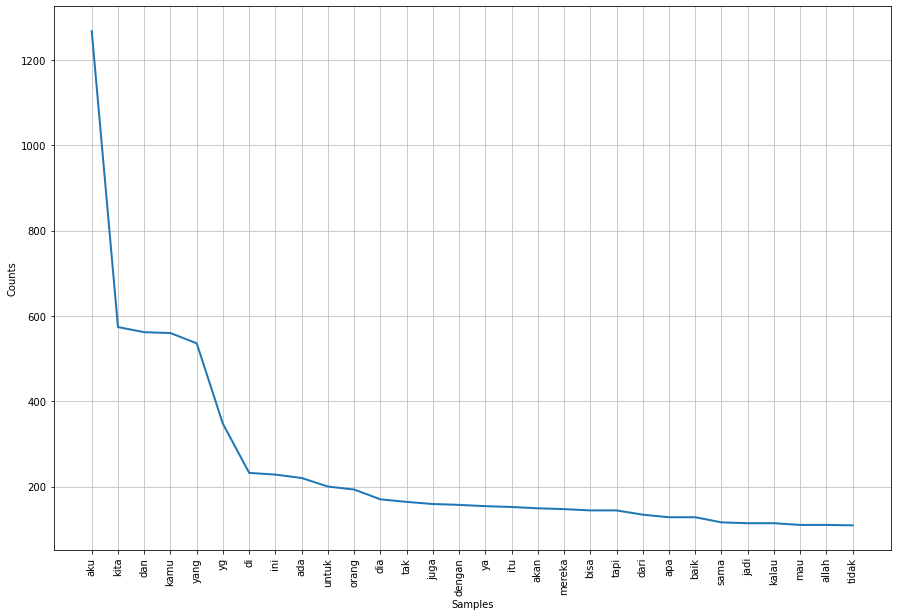

In [20]:
plt.figure(figsize=(15, 10))
token(pos).plot(30)

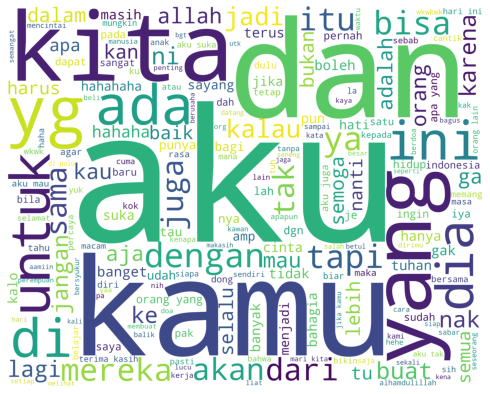

In [21]:
wordcloud_draw(positif)

In [22]:
token(netr)

FreqDist({'aku': 2218, 'kamu': 962, 'dan': 913, 'kita': 873, 'yang': 825, 'di': 749, 'yg': 587, 'ada': 531, 'apa': 506, 'ini': 498, ...})

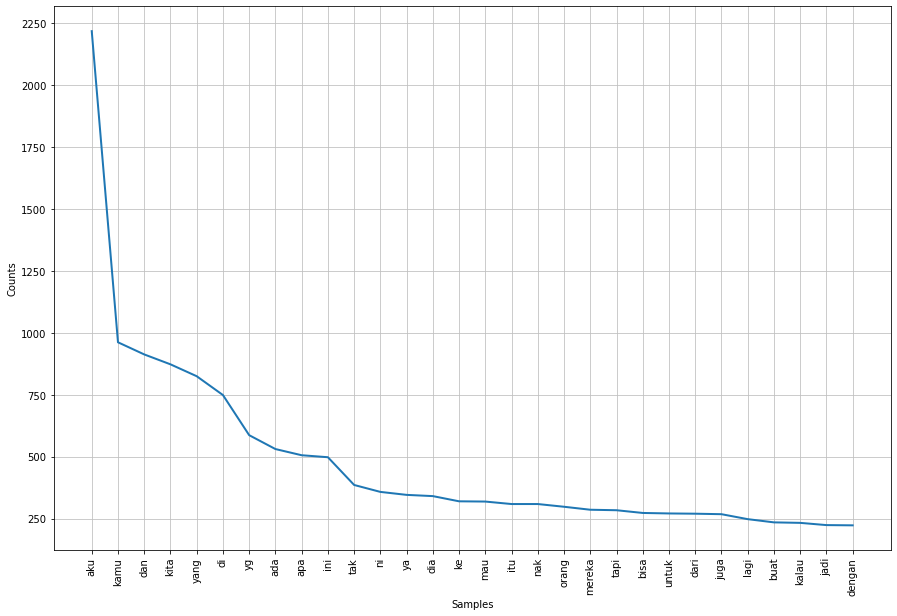

In [23]:
plt.figure(figsize=(15, 10))
token(netr).plot(30)

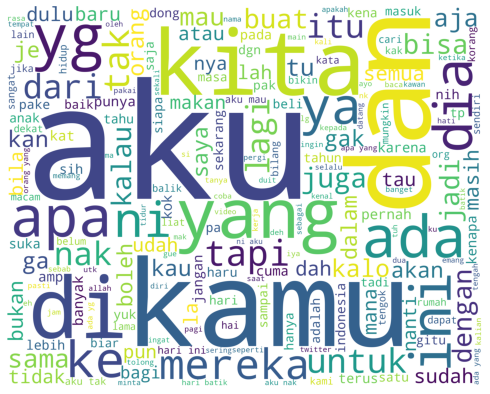

In [24]:
wordcloud_draw(netral)

In [25]:
token(neg)

FreqDist({'aku': 1495, 'kamu': 566, 'yang': 522, 'kita': 419, 'dan': 401, 'tak': 389, 'yg': 379, 'orang': 286, 'di': 284, 'dia': 269, ...})

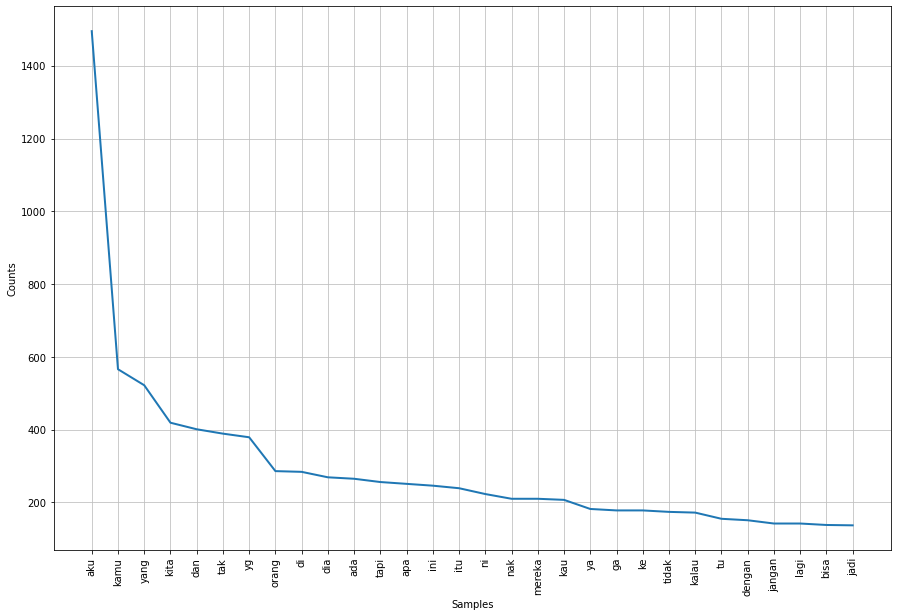

In [26]:
plt.figure(figsize=(15, 10))
token(neg).plot(30)

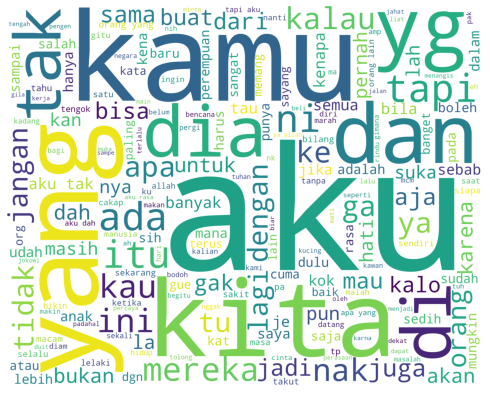

In [27]:
wordcloud_draw(negatif)

<h2>Pemodelan Pertama</h2>



In [28]:
# import library for sentiment analysis.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sm = SentimentIntensityAnalyzer()

In [29]:
sm.polarity_scores("kamu sedang sedih")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [30]:
print(sm.polarity_scores("hari ini saya dan kamu sedang merasa sangat senang"))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [31]:
model1=df
model1["score"] = model1["Tweet"].apply(lambda Tweet : sm.polarity_scores(Tweet))

In [32]:
df.head()

,sentimen,Tweet,score
0,0,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,"{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'comp..."
1,0,kita lanjutkan saja diam ini hingga kau dan ak...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2,doa rezeki tak putus inna haa zaa larizquna ma...,"{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'comp..."
3,2,makasih loh ntar kita bagi hasil aku 99 9 sisa...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,0,aku tak faham betul jenis orang malaysia yang ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [33]:
df.tail()

,sentimen,Tweet,score
10252,2,Jangan membandingkan kehidupanmu dengan kehidu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
10253,1,Sini uname lu ntar gua follow,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
10254,2,Apapun yg telah kamu lakukan apapun kesalahanm...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
10255,2,3 cara untuk ingat semula apa yang kita dah ha...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
10256,2,Semoga Allah permudahkan urusan aku amp orang ...,"{'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'comp..."


In [34]:
# extract only compound score
df["sentiment_score"] = df["score"].apply(lambda x: x["compound"])
df.head(10)

,sentimen,Tweet,score,sentiment_score
0,0,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,"{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'comp...",0.4939
1,0,kita lanjutkan saja diam ini hingga kau dan ak...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,2,doa rezeki tak putus inna haa zaa larizquna ma...,"{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'comp...",-0.5106
3,2,makasih loh ntar kita bagi hasil aku 99 9 sisa...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,0,aku tak faham betul jenis orang malaysia yang ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
5,1,barusan liat tulisan di belakang truk rela inj...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
6,0,cerita dia macam ni mamat ni hari2 aku nampak ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
7,2,ya aku akan menjadi satu satunya bukan nomor s...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
8,0,aku aja capek sama diriku sendiri apalagi kamu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
9,0,aku cuba nak amalkan sikap pergi mampus tapi s...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [35]:
columns = ['score', 'sentiment_score']
df = df.drop(columns, axis=1)

In [36]:
corpus = []
for i in range(0, 10257):
    kata_ganti = 'aku','kamu','dia','mereka','saya','kami','kita','anda','kau','kalian','beliau' 
    Tweet = re.sub('[^a-zA-Z]', ' ', df['Tweet'][i])
#     Tweet = re.sub("['aku','kamu','dia','mereka','saya','kami','kita','anda','kau','kalian','beliau']",'',df['Tweet'][i])
#     Tweet = Tweet.replace('aku','')
#     Tweet = Tweet.replace('kamu','')
#     Tweet = Tweet.replace('dia','')
#     Tweet = Tweet.replace('mereka','')
#     Tweet = Tweet.replace('kita','')
#     Tweet = Tweet.replace('dan','')
#     Tweet = Tweet.replace('yang','')
    Tweet = Tweet.lower()
    Tweet = Tweet.split()
    ps = PorterStemmer()
    all_stopwords = stop
    Tweet = [ps.stem(word) for word in Tweet if not word in set(all_stopwords)]
    Tweet = ' '.join(Tweet)
    corpus.append(Tweet)
print(corpus)

['lagu bosan apa yang aku save ni huhuhuhuhuhuhuhuhuhuuuuuuuuuuuuuu', 'kita lanjutkan saja diam ini hingga kau dan aku mengerti tidak semua kebersamaan haru melibatkan hati', 'doa rezeki tak putu inna haa zaa larizquna maa lahu min na fadesungguhnya ini ialah pemberian kami kepada kamu p', 'makasih loh ntar kita bagi hasil aku sisanya buat kamu', 'aku tak faham betul jeni orang malaysia yang tak reti nak sangkut balik hose tu aku geli bodoh nak pegang', 'barusan liat tulisan di belakang truk rela injek kopl demi kamu bisa shop', 'cerita dia macam ni mamat ni hari aku nampak keluar masuk cimb ceria ja tapi hari ni aku tengok muka dia masam aku p', 'ya aku akan menjadi satu satunya bukan nomor satu tetapi satu satunya', 'aku aja capek sama diriku sendiri apalagi kamu maaf ya', 'aku cuba nak amalkan sikap pergi mampu tapi sayang aku gagal sebab aku jeni mudah kesian dan mudah memaafkan', 'itu lho miss kevin sama keven rebutan gimbot ya wi aku beli ae sambil nunjuk twin yg asik main ipad m

In [37]:
# Penghitungan Jumlah
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df['sentimen']
y = to_categorical(y)

In [38]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

<h3>Decision Tree Classifier</h3>

In [41]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC = DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

print('Decision Tree Classifier accuracy : ',accuracy_score(y_test, y_pred))

Decision Tree Classifier accuracy :  0.47173489278752434


<h3>Random Forest Classifier</h3>

In [42]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

print('Random Forest Classifier accuracy : ',accuracy_score(y_test, y_pred))

Random Forest Classifier accuracy :  0.41130604288499023


<h2>Pemodelan Kedua</h2>



In [44]:
data_tweet = df['Tweet'].tolist()
y = df['sentimen']
y = to_categorical(y)

In [45]:
df['sentimen'].value_counts()

1    5084
0    2691
2    2482
Name: sentimen, dtype: int64

In [46]:
token = Tokenizer()
token.fit_on_texts(data_tweet)
token.index_word

{1: 'aku',
 2: 'kamu',
 3: 'kita',
 4: 'yang',
 5: 'dan',
 6: 'yg',
 7: 'di',
 8: 'ada',
 9: 'ini',
 10: 'tak',
 11: 'apa',
 12: 'dia',
 13: 'orang',
 14: 'ya',
 15: 'ni',
 16: 'itu',
 17: 'tapi',
 18: 'mereka',
 19: 'nak',
 20: 'ke',
 21: 'untuk',
 22: 'juga',
 23: 'mau',
 24: 'bisa',
 25: 'kalau',
 26: 'dari',
 27: 'dengan',
 28: 'lagi',
 29: 'jadi',
 30: 'sama',
 31: 'buat',
 32: 'kau',
 33: 'aja',
 34: 'ga',
 35: 'akan',
 36: 'tidak',
 37: 'tu',
 38: 'jangan',
 39: 'kalo',
 40: 'gak',
 41: 'dah',
 42: 'hari',
 43: 'bukan',
 44: 'dalam',
 45: 'semua',
 46: 'kan',
 47: 'karena',
 48: 'masih',
 49: 'suka',
 50: 'pernah',
 51: 'pun',
 52: 'boleh',
 53: 'je',
 54: 'lebih',
 55: 'baik',
 56: 'tau',
 57: 'saya',
 58: 'lah',
 59: 'allah',
 60: 'mana',
 61: 'baru',
 62: 'banyak',
 63: 'adalah',
 64: 'lain',
 65: 'nanti',
 66: 'nya',
 67: 'la',
 68: 'harus',
 69: 'udah',
 70: 'dulu',
 71: 'sudah',
 72: 'bila',
 73: 'punya',
 74: 'jika',
 75: 'batik',
 76: 'hati',
 77: 'atau',
 78: 'satu',
 7

In [47]:
voc = len(token.index_word)+1
voc

22710

In [48]:
x = ['aku hari ini sedang senang sekali']
token.texts_to_sequences(x)

[[1, 42, 9, 273, 530, 188]]

In [49]:
encode_text = token.texts_to_sequences(data_tweet)

In [50]:
max_word = 30
X = pad_sequences(encode_text, maxlen = max_word, padding='post')
X

array([[  430,   993,    11, ...,     0,     0,     0],
       [    3,  4251,   108, ...,     0,     0,     0],
       [  323,   509,    10, ...,     0,     0,     0],
       ...,
       [  335,     6,   300, ...,     0,     0,     0],
       [  127,   216,    21, ...,     0,     0,     0],
       [  140,    59, 22709, ...,     0,     0,     0]])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1, random_state=0)

In [52]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

<h3>Decision Tree Classifier</h3>

In [53]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC = DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

print('Decision Tree Classifier accuracy : ',accuracy_score(y_test, y_pred))

Decision Tree Classifier accuracy :  0.37037037037037035


<h3>Random Forest Classifier</h3>

In [54]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

print('Random Forest Classifier accuracy : ',accuracy_score(y_test, y_pred))

Random Forest Classifier accuracy :  0.24463937621832357


In [55]:
vec_size = 300
model = Sequential()

model.add(Embedding(voc, vec_size, input_length = max_word))
model.add(Conv1D(64,8, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 300)           6813000   
_________________________________________________________________
conv1d (Conv1D)              (None, 23, 64)            153664    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 64)            0         
_________________________________________________________________
dense (Dense)                (None, 11, 32)            2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 32)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 11, 16)            5

In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
289/289 [==============================] - 60s 208ms/step - loss: 1.0372 - accuracy: 0.4992 - val_loss: 1.0120 - val_accuracy: 0.5175
Epoch 2/30
289/289 [==============================] - 55s 189ms/step - loss: 0.9184 - accuracy: 0.5725 - val_loss: 0.9910 - val_accuracy: 0.5478
Epoch 3/30
289/289 [==============================] - 52s 180ms/step - loss: 0.6673 - accuracy: 0.7208 - val_loss: 1.0229 - val_accuracy: 0.5341
Epoch 4/30
289/289 [==============================] - 50s 173ms/step - loss: 0.4322 - accuracy: 0.8401 - val_loss: 1.1031 - val_accuracy: 0.5127
Epoch 5/30
289/289 [==============================] - 50s 173ms/step - loss: 0.3016 - accuracy: 0.9006 - val_loss: 1.1594 - val_accuracy: 0.5409
Epoch 6/30
289/289 [==============================] - 50s 174ms/step - loss: 0.2211 - accuracy: 0.9316 - val_loss: 1.3130 - val_accuracy: 0.5322
Epoch 7/30
289/289 [==============================] - 51s 178ms/step - loss: 0.1843 - accuracy: 0.9440 - val_loss: 1.3284 - val_ac

<h2>Submission</h2>

In [58]:
def get_encode(x):
    x = token.texts_to_sequences(x)
    x = pad_sequences(x, maxlen =  max_word, padding='post')
    return x

In [59]:
kata = ['hari ini hujan dan aku sedang galau']

In [60]:
get_encode(kata)

array([[  42,    9,  893,    5,    1,  273, 2933,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]])

In [61]:
model.predict_classes(get_encode(kata))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0], dtype=int64)

In [62]:
kata = ['tak peduli seberapa keras kamu mencoba kamu tak akan pernah bisa menyangkal apa yang kamu rasa']
model.predict_classes(get_encode(kata))

array([2], dtype=int64)

In [63]:
kata = ['jangan terburu buru mengartikan segala yang baru kamu lihat dari permukaan segala yang tampak belum tentu sesuai']
model.predict_classes(get_encode(kata))

array([1], dtype=int64)

In [64]:
kata = ['jangan ambil dosen itu dia nilainya bagus cuma kita nanti nggak usaha apa apa']
model.predict_classes(get_encode(kata))

array([0], dtype=int64)

In [65]:
kata = ['saya galau']
model.predict_classes(get_encode(kata))

array([0], dtype=int64)

In [66]:
kata = ['saya senang']
model.predict_classes(get_encode(kata))

array([2], dtype=int64)

In [67]:
kata = ['saya bahagia']
model.predict_classes(get_encode(kata))

array([1], dtype=int64)